<a href="https://colab.research.google.com/github/collinsbett1/K-Nearest-Neighbours-KNN-and-Naive-Bayes-Classifier-Implimentation/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classifier applied to the Titanic dataset

## 1. Defining the Question

## a) Specifying the Question
Build a model that predicts whether a passenger survives or not.

## b) Defining the Metric for Success
For the project to be declared a success we need to get an accuracy of above 70%.

## c) Understanding the context
The sinking of the Titanic is an event that occured in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. This is after it struck an iceberg. It resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

The task is to build a model that predicts whether a passenger survives or not.

## 2. Reading the Data

In [1]:
# Importing the necessary libraries
# For data analysis
import pandas as pd
import numpy as np

# For creating visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# For Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# for creating models 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# For prevention of warning messages
import warnings
warnings.filterwarnings(action = 'ignore')

# Reading the dataset
df = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [2]:
# Reading the head of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Reading the tail of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 3. Data Understanding

In [4]:
#getting the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking the size of the dataset
df.shape

(891, 12)

In [6]:
# Checking the statistical summary of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Data Cleaning

In [7]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()

# Preview the column names to check for execution
df.columns 

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
# Dropping the passengeid, name and ticket columns since they are not significant 
df.drop(['passengerid', 'name', 'ticket'],axis = 1, inplace=True)

In [9]:
# Checking for null values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

In [10]:
#checking the number of times ? appears in each column
(df.iloc[:,1:12] == '?').sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

In [11]:
# Checking for null values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)

cabin       77.10
age         19.87
embarked     0.22
survived     0.00
pclass       0.00
sex          0.00
sibsp        0.00
parch        0.00
fare         0.00
dtype: float64

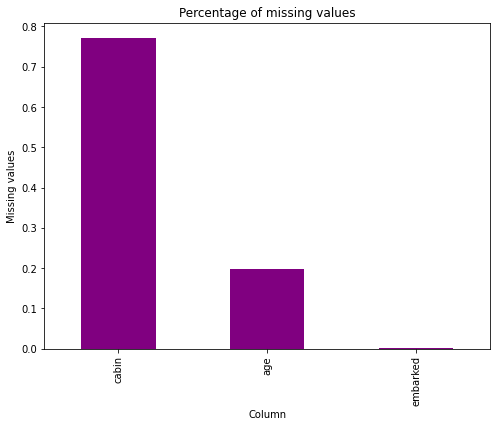

In [12]:
# Visualising missing values
#
df.isna().mean().round(4).sort_values(ascending = False)[:3].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [13]:
# Drop the cabin column since it has alot of null values(more than 75%)
df.drop(['cabin'], axis = 1, inplace = True)

In [14]:
# Filling missing values in the age column with mean
#
df['age'].fillna(df['age'].mean(), inplace = True)
#
# Filling missing values in the embarked column with mode
#
df.embarked.fillna(df.embarked.mode()[0], inplace = True)


In [15]:
# Checking for duplicates in the dataset
df.duplicated().sum()

111

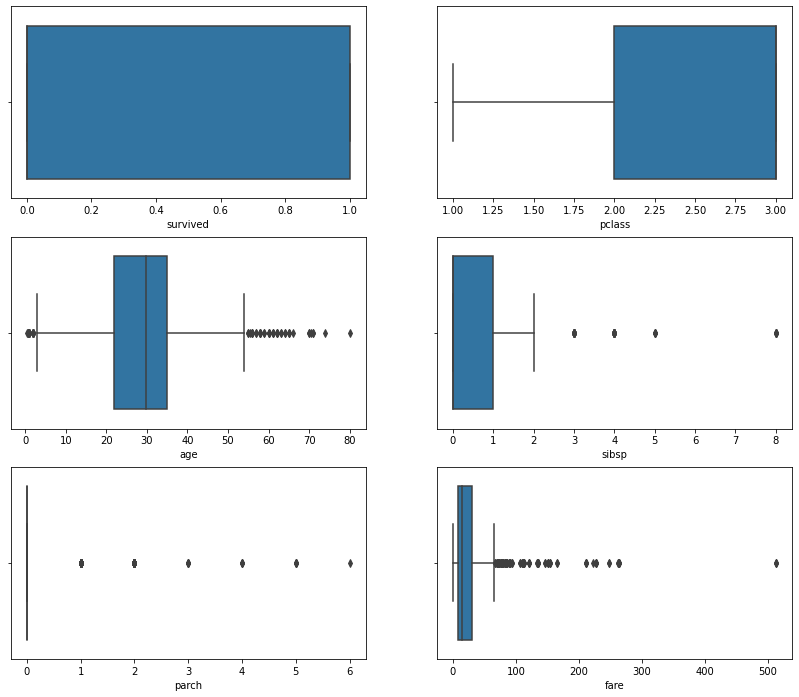

In [16]:
#checking for outliers
# creating an array for numerical columns
numerical_columns = ['survived', 'pclass','age', 'sibsp',
       'parch','fare']

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),df,numerical_columns):
  sns.boxplot(df[column],ax=ax)


> The outliers shall be retained since they are relevant.

## 5. Exploratory Data Analysis.

### 5.1 Univariate Analysis

#### 5.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [17]:
#using for loops to get the mean, mode and median for numerical columns
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df[column].mean()))
  print(column + ', Mode: ' + str(df[column].mode()))
  print(column + ', Median: ' + str(df[column].median()))



survived, Mean: 0.3838383838383838
survived, Mode: 0    0
dtype: int64
survived, Median: 0.0


pclass, Mean: 2.308641975308642
pclass, Mode: 0    3
dtype: int64
pclass, Median: 3.0


age, Mean: 29.699117647058763
age, Mode: 0    29.699118
dtype: float64
age, Median: 29.69911764705882


sibsp, Mean: 0.5230078563411896
sibsp, Mode: 0    0
dtype: int64
sibsp, Median: 0.0


parch, Mean: 0.38159371492704824
parch, Mode: 0    0
dtype: int64
parch, Median: 0.0


fare, Mean: 32.2042079685746
fare, Mode: 0    8.05
dtype: float64
fare, Median: 14.4542


##### b) Measures of Dispersion

In [18]:
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df[column].std()))
  print(column + ', Variance: ' + str(df[column].var()))
  print(column + ', Skewness: ' + str(df[column].skew()))
  print(column + ', Kurtosis: ' + str(df[column].kurt()))
  print(column + ', Quartiles: ' + str(df[column].quantile([0.25,0.5,0.75])))



survived, Standard deviation: 0.4865924542648585
survived, Variance: 0.2367722165474984
survived, Skewness: 0.4785234382949897
survived, Kurtosis: -1.775004671066304
survived, Quartiles: 0.25    0.0
0.50    0.0
0.75    1.0
Name: survived, dtype: float64


pclass, Standard deviation: 0.8360712409770513
pclass, Variance: 0.6990151199889065
pclass, Skewness: -0.6305479068752845
pclass, Kurtosis: -1.2800149715782825
pclass, Quartiles: 0.25    2.0
0.50    3.0
0.75    3.0
Name: pclass, dtype: float64


age, Standard deviation: 13.002015226002884
age, Variance: 169.05239993721085
age, Skewness: 0.4344880940129925
age, Kurtosis: 0.9662793026645233
age, Quartiles: 0.25    22.000000
0.50    29.699118
0.75    35.000000
Name: age, dtype: float64


sibsp, Standard deviation: 1.1027434322934275
sibsp, Variance: 1.2160430774662894
sibsp, Skewness: 3.6953517271630565
sibsp, Kurtosis: 17.880419726645968
sibsp, Quartiles: 0.25    0.0
0.50    0.0
0.75    1.0
Name: sibsp, dtype: float64


parch, Standar

#### 5.1.2 Categorical Variables

##### a) Frequency Tables

In [19]:
# Getting the value counts of the categorical variables
# creating an array of categrical columns
categorical_columns=['sex', 'embarked']
print(df.sex.value_counts())
print('************************')
print(df.embarked.value_counts())


male      577
female    314
Name: sex, dtype: int64
************************
S    646
C    168
Q     77
Name: embarked, dtype: int64


##### b) Bar Charts

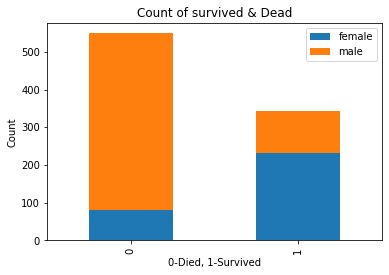

In [20]:
# Stacked bar of country and gender
pd.crosstab(df['survived'], df['sex']).plot(kind='bar', stacked=True)

# Labeling our y axis
plt.ylabel("Count")

# Labeling our x axis
plt.xlabel("0-Died, 1-Survived")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Count of survived & Dead")

# Displaying our chart
plt.show()

> There were less survivors than those who died among the passengers.
> More than half of those who survived were female.
> More than half of those who died were died were male

##### c) Histograms

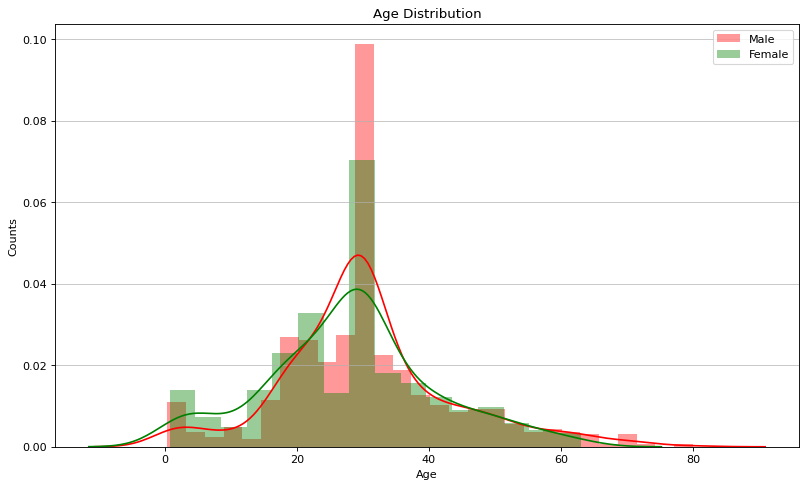

In [21]:
#visualizing age dirstibution per gender
male = df.loc[df.sex=='male', 'age']    
female = df.loc[df.sex=='female', 'age']

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="red", label="Male")
sns.distplot(female, color="green", label="Female")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

> Most of the pasengers were aged between 20 to 40 and most of them were male.


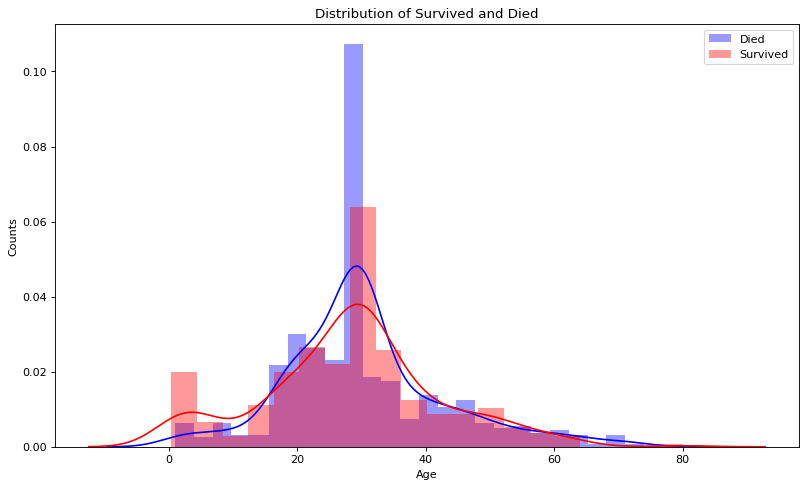

In [22]:
#visualizing survivors dirstibution per age
died = df.loc[df.survived== 0, 'age']    
survived = df.loc[df.survived== 1, 'age']

plt.figure(figsize=(12,7), dpi= 80)

sns.distplot(died, color="blue", label="Died")
sns.distplot(survived, color="red", label="Survived")
plt.title('Distribution of Survived and Died')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.show()

> Most of the passengers in the median age group died.
> Most of the young passengers survived.

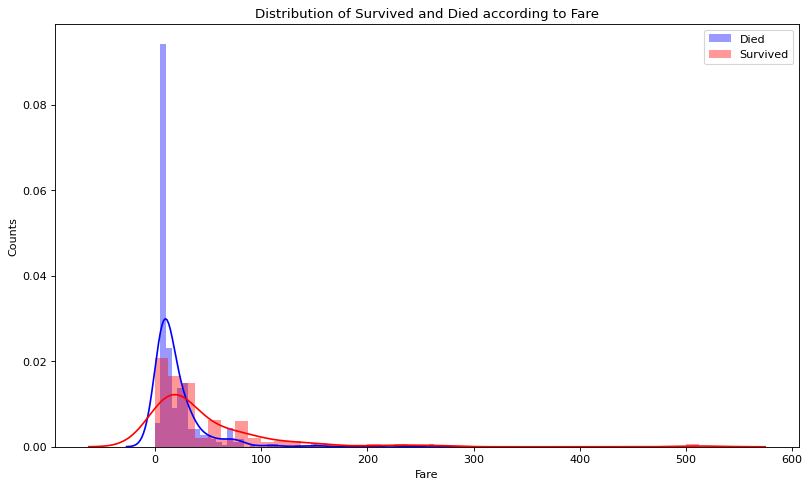

In [23]:
#visualizing survivors dirstibution according to fare
died = df.loc[df.survived== 0, 'fare']    
survived = df.loc[df.survived== 1, 'fare']

plt.figure(figsize=(12,7), dpi= 80)

sns.distplot(died, color="blue", label="Died")
sns.distplot(survived, color="red", label="Survived")
plt.title('Distribution of Survived and Died according to Fare')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.legend()
plt.show()

> Majority of the low paying passengers passed away.

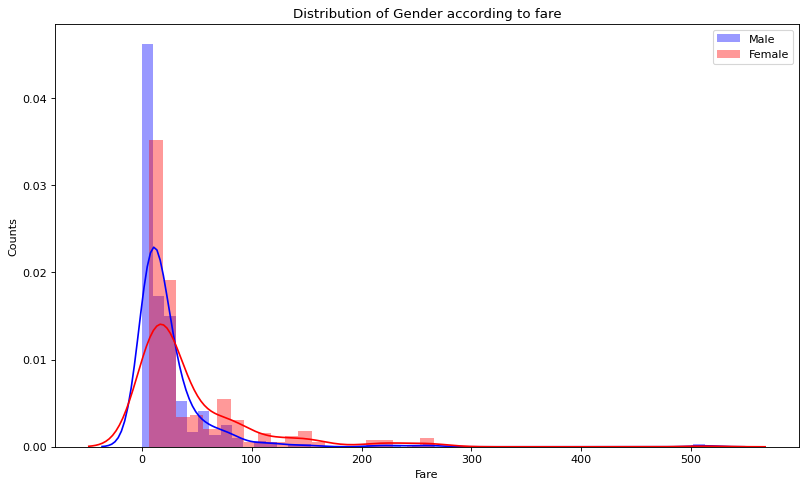

In [24]:
#visualizing gender dirstibution according to fare
male = df.loc[df.sex=='male', 'fare']    
female = df.loc[df.sex=='female', 'fare']

plt.figure(figsize=(12,7), dpi= 80)

sns.distplot(male, color="blue", label="Male")
sns.distplot(female, color="red", label="Female")
plt.title('Distribution of Gender according to fare')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.legend()
plt.show()

> Most of the passengers who paid low fares were male.
> Most of the passengers whow paid high fares were female. 

### 5.2 Bivariate Analysis.

### 5.2.1 Numerical and Numerical

##### a) Pair Plot

<Figure size 480x320 with 0 Axes>

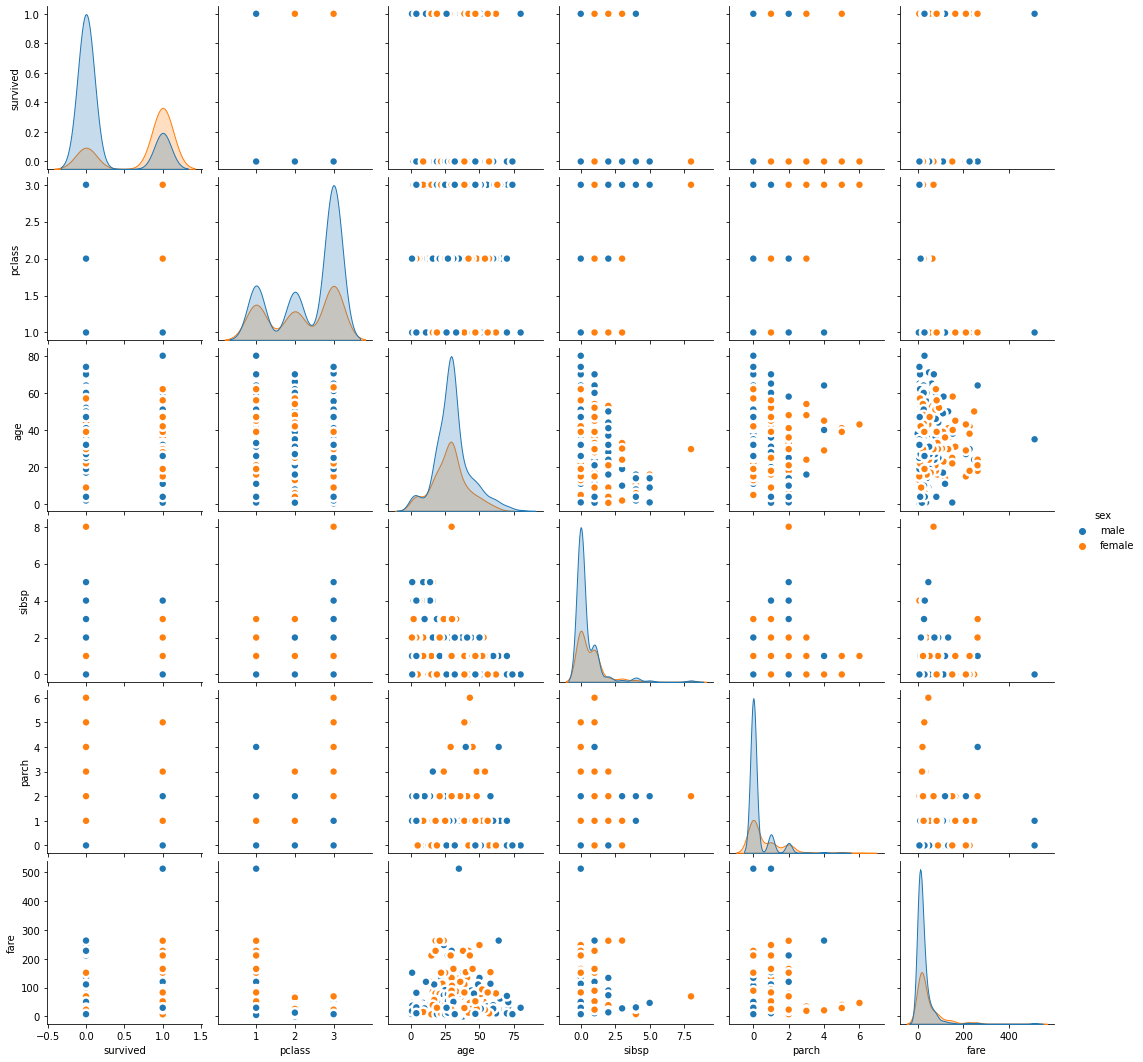

In [25]:
# Bivariate summaries
plt.figure(dpi= 80)
sns.pairplot(df, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

##### b) Correlation

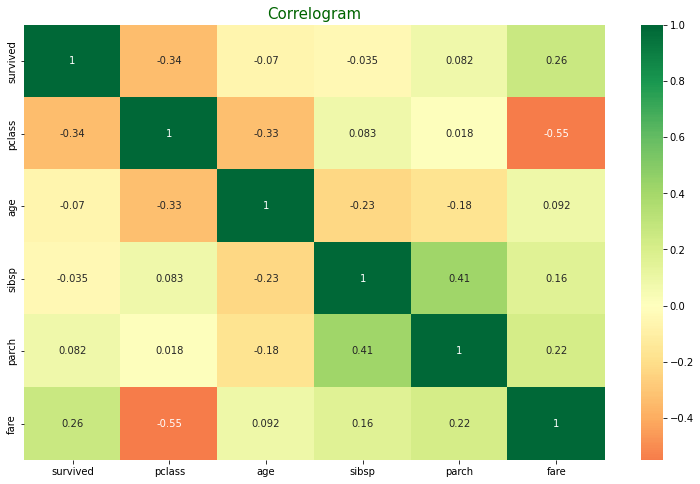

In [26]:
# Plotting a heatmap to show correlations between variables
#
corr = df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

> The fare column had a high negative correlation with pclass and a low positive correlation with survived, sibsp and parch and an even lower positive correlation with age.
> Parch had a nearly medium positive correlation with sibsp.

##### c) Bar Charts

In [27]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

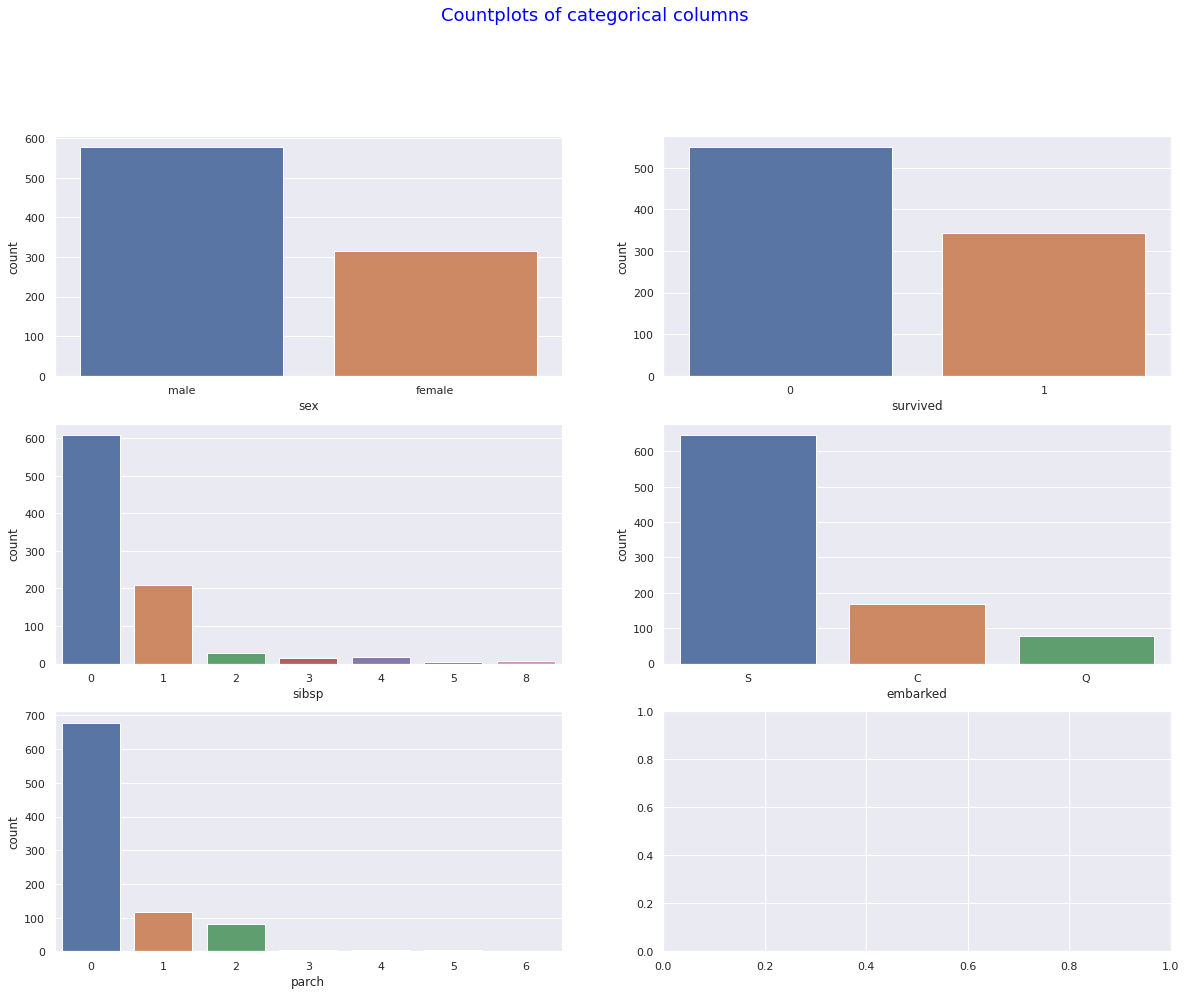

In [28]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns2 =[ 'sex', 'survived','sibsp','embarked','parch']


sns.set(style = 'darkgrid', context = 'notebook')
corr = df.corr()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df, categorical_columns2):
   sns.countplot(df[column], ax=ax)


## 6. Creating the KNN model.

### 6.1 80-20 Split

In [29]:
# Selecting the independent variables and the target variable
#
X = df.drop('survived', axis = 1)
y = df.survived

# Encoding categorical variables(embarked)
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating the model
#
model = KNeighborsClassifier(n_neighbors=5)
model_ = model.fit(X_train, y_train)

# Making predictions
#
y_pred = model.predict(X_test)

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy score is: 0.8044692737430168 and the f1 score is 0.732824427480916


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



array([[96, 14],
       [21, 48]])

### 6.2 70-30 Split

In [30]:
# Selecting the independent variables and the target variable
#
X = df.drop('survived', axis = 1)
y = df.survived

# Encoding categorical variables(embarked)
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating the model
#
model = KNeighborsClassifier(n_neighbors=5)
model_ = model.fit(X_train, y_train)

# Making predictions
#
y_pred = model.predict(X_test)

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy score is: 0.7761194029850746 and the f1 score is 0.7


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.70      0.70      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



array([[138,  30],
       [ 30,  70]])

### 6.3 60-40 Split

In [31]:
# Selecting the independent variables and the target variable
#
X = df.drop('survived', axis = 1)
y = df.survived

# Encoding categorical variables(embarked)
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
#
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating the model
#
model = KNeighborsClassifier(n_neighbors=5)
model_ = model.fit(X_train, y_train)

# Making predictions
#
y_pred = model.predict(X_test)

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy score is: 0.7787114845938375 and the f1 score is 0.6973180076628351


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       221
           1       0.73      0.67      0.70       136

    accuracy                           0.78       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.78      0.78      0.78       357



array([[187,  34],
       [ 45,  91]])

> The 80-20 split had the highest accuracy and F1 score compared to the 70-30 and 60-40 split.

### 6.4 Hyperparameter Tuning

In [35]:
# Using GridSearch to find optimum k-value
k_range=range(1,31)
param_grid=dict(n_neighbors=k_range)

print(param_grid)
#
grid_search = GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)
#
print('*************************')
# Checking for the best model
#
# Highest score using GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
#
print('**************************')
# Parameters that having the best results
print('Tuned Parameters :','\n\n', (grid_search.best_params_))
#
print('***************************')
# print estimator that was chosen by the GridSearch
print('\n\nEstimator chosen :','\n\n', (grid_search.best_estimator_))

{'n_neighbors': range(1, 31)}
*************************
GridSearch CV best score : 0.8165


**************************
Tuned Parameters : 

 {'n_neighbors': 9}
***************************


Estimator chosen : 

 KNeighborsClassifier(n_neighbors=9)


### 6.5 Fitting the model with the optimized parameters

In [36]:
# Using the 80-20 split dataset.
# Selecting the independent variables and the target variable
#
X = df.drop('survived', axis = 1)
y = df.survived

# Encoding categorical variables(embarked)
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating the model
#
model = KNeighborsClassifier(n_neighbors=9)
model_ = model.fit(X_train, y_train)

# Making predictions
#
y_pred = model.predict(X_test)

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.8156424581005587 and the f1 score is 0.7401574803149606


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



array([[99, 11],
       [22, 47]])

> The accuracy and F1 score in the 80-20 split dataset improved when we used the optimized hyperparameter.

## 7. Conclusion
> The best train-test split was the 80-20 split.
> When hyperparameter tuning was done and a model based on it was made the accuracy and f1 score improved.